# Car Price Prediction Using Machine Learning

In this analysis we are going to predict car price using machine learning methods


In [6]:
#Import some libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\zubai\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib.libs'

# Gathering and Exploring Data

In [ ]:
#Lets get data

df=pd.read_csv("data/car_data.csv")

df.head(10)

In [23]:
#tail method to check some last rows and total rows 

df.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [24]:
#to check total rows and columns
df.shape

(301, 9)

In [25]:
#to get information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [26]:
#check the null values

df.isnull().sum()

#shows no null values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
df.describe()

#This gives overall stats of data

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Preprocessing

In [28]:
#lets add another column into our dataframe called Age of vehicles

import datetime

datetime = datetime.datetime.now()

#Lets fetch only year

datetime.year

2023

In [29]:
df["Age"]=datetime.year - df["Year"]

df.head(5)

#we are just dropping year column as we dont need

df.drop("Year",axis=1,inplace=True)

# Removing Outlier

<Axes: >

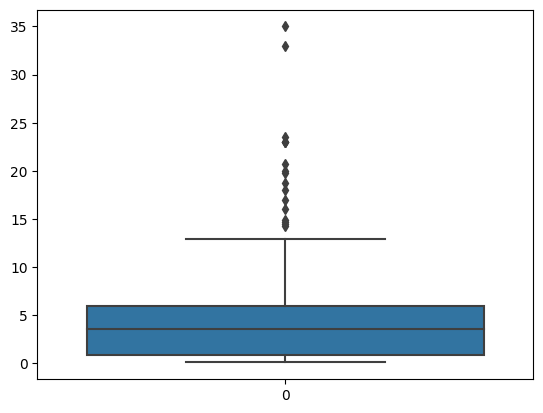

In [30]:
#Lets plot boxplot
sns.boxplot(df["Selling_Price"])
plt.show()

#shows there are some outliers 

In [31]:
sorted(df["Selling_Price"],reverse=True)

#we will be removing first two values

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.6

In [32]:
df= df[~(df["Selling_Price"]>=33) & (df["Selling_Price"]<=35)]
df.shape

#It shows 3 values have been droped which are outliers

(299, 9)

# Exploring Categorical values 

In [33]:
df.head(10)

#It shows that fuel_type , seller_type and transmission are categorical values.so we have to encode them

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9
5,vitara brezza,9.25,9.83,2071,Diesel,Dealer,Manual,0,5
6,ciaz,6.75,8.12,18796,Petrol,Dealer,Manual,0,8
7,s cross,6.50,8.61,33429,Diesel,Dealer,Manual,0,8
8,ciaz,8.75,8.89,20273,Diesel,Dealer,Manual,0,7
9,ciaz,7.45,8.92,42367,Diesel,Dealer,Manual,0,8


In [34]:
df["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [35]:
#we have 3 unique values.so we will assign 0,1,2 values to this categorical data
df["Fuel_Type"] = df["Fuel_Type"].map({"Petrol":0,"Diesel":1,"CNG":2})

df["Seller_Type"] = df["Seller_Type"].map({"Dealer":0,"Individual":1})

df["Transmission"]= df["Transmission"].map({"Manual":0,"Automatic":1})

In [36]:
#we will repeat the same for others columns too
df.tail(10)

#Look now we have endcoded categorical data also.

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
291,brio,5.40,6.10,31427,0,0,0,0,8
292,jazz,6.40,8.40,12000,0,0,0,0,7
293,city,3.25,9.90,38000,0,0,0,0,13
294,amaze,3.75,6.80,33019,0,0,0,0,9
295,city,8.55,13.09,60076,1,0,0,0,8
296,city,9.50,11.60,33988,1,0,0,0,7
297,brio,4.00,5.90,60000,0,0,0,0,8
298,city,3.35,11.00,87934,0,0,0,0,14
299,city,11.50,12.50,9000,1,0,0,0,6
300,brio,5.30,5.90,5464,0,0,0,0,7


# Store Feature MATRIX in X and response(Target) in y 

In [37]:
#From here we start Machine learning addition into our project
X=df.drop(["Car_Name","Selling_Price"],axis=1)
y=df["Selling_Price"]

y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

# Splitting Data into Training and Test set

In [38]:
from sklearn.model_selection import train_test_split


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# Import The Models

In [46]:
#As selling price is our target column and it seems that it is continous values so will import linear models

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Model Training

In [47]:
lr= LinearRegression()
lr.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)

xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
y_pred1=lr.predict(X_test)
y_pred2=rf.predict(X_test)
y_pred3=gb.predict(X_test)
y_pred4=xgb.predict(X_test)

# Evaluating Algorithm

In [51]:
from sklearn import metrics

score1= metrics.r2_score(y_test,y_pred1)
score2= metrics.r2_score(y_test,y_pred2)
score3= metrics.r2_score(y_test,y_pred3)
score4= metrics.r2_score(y_test,y_pred4)
print(score1,score2,score3,score4)

0.6790884983129397 0.7307707052059744 0.8821051054137967 0.8864839405756888


In [55]:
Final_Data= pd.DataFrame({"Models":["LR","RF","GB","XGB"],"R2_Scores":[score1,score2,score3,score4]})
Final_Data

#Just wow.we checked four models and here is score of all.Lets plot

,Models,R2_Scores
0,LR,0.679088
1,RF,0.730771
2,GB,0.882105
3,XGB,0.886484


<Axes: xlabel='Models', ylabel='R2_Scores'>

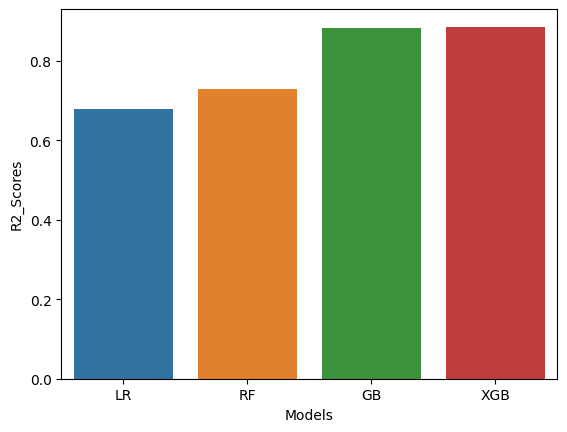

In [57]:
#Lets plot

sns.barplot(x="Models",y="R2_Scores",data=Final_Data)
plt.show()

 #It clearly shows that Xgb has highest score and this is model we will be using

# Save The Model

In [59]:
#Lets train our best model
xgb= XGBRegressor()
Final_model=xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [62]:
import joblib
joblib.dump(Final_model,"Car_Price_Predict_Model")

Our_Model=joblib.load("Car_Price_Predict_Model")